In [1]:
import rasterio
from rasterio.plot import show
from rasterio.merge import merge
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
## Loading 2022 november 14th landsat 9 raster images
bin_folder = r'/Users/ihasan/Downloads/Baki sir/downloadedImage/L1T1_1973'

In [4]:
# Raster names from folder
raster_names23 = np.array([i for i in os.listdir(bin_folder) if i.endswith('.tif')])
raster_names23

array(['LM01_148042_19721211_prj.tif', 'LM01_148042_19721211.tif',
       'LM01_148043_19721211.tif'], dtype='<U28')

In [8]:
# loading raster with rasterio and appedning to an array
raster_list = [rasterio.open(os.path.join(bin_folder, i)) for i in raster_names23[[0,2]]]

In [9]:
for i in raster_list:
    print(i.crs)

EPSG:32645
EPSG:32645


<AxesSubplot:>

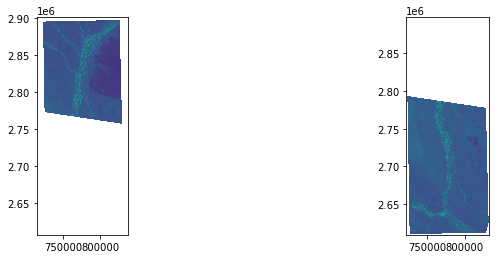

In [10]:
# Create plots next to each other
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot first four files
show(raster_list[0], ax=ax[0])
show(raster_list[1], ax=ax[1])
# show(raster_list[2], ax=ax[0, 2])
# show(raster_list[3], ax=ax[1, 0])
# show(raster_list[4], ax=ax[1, 1])
# show(raster_list[5], ax=ax[1, 2])

In [11]:
mosaic, out_trans = merge(np.array(raster_list), nodata=np.nan )

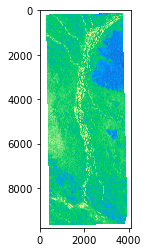

<AxesSubplot:>

In [12]:
# Plot the result
show(mosaic[1], cmap='terrain')

In [33]:
raster_list[0].crs

CRS.from_epsg(32645)

## Saving the mosaic into local machine

In [14]:
# Copy the metadata
out_meta = raster_list[0].meta.copy()

# Update the metadata
out_meta.update({"driver": "GTiff",
                 "height": mosaic.shape[1],
                 "width": mosaic.shape[2],
                 "transform": out_trans,
                 "crs": raster_list[0].crs
                 }
                )

out_fp = os.path.join(bin_folder, 'mosaic11Dec72.tif')

# Write the mosaic raster to disk
with rasterio.open(out_fp, "w", **out_meta) as dest:
    dest.write(mosaic)
    dest.close()